In [87]:
from scipy.io import arff
import pandas as pd
import numpy as np
data = arff.loadarff('hypothyroid_modified_cjlin.arff')
df = pd.DataFrame(data[0])
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'


In [88]:
df2 = pd.get_dummies(df)
df2

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,23.0,4.10,2.0,102.0,1.00,106.0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,46.0,0.98,1.7,109.0,0.91,120.0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
3,70.0,0.16,1.9,175.0,1.00,106.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,70.0,0.72,1.2,61.0,0.87,70.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3394,68.0,1.00,2.1,124.0,1.08,114.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3395,74.0,5.10,1.8,112.0,1.07,105.0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3396,72.0,0.70,2.0,82.0,0.94,87.0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0


In [89]:
feature_x = np.empty([3398,41])
#label_y = np.empty([3398,4])
label_y = []
for i in range(3398):
    now = 0
    for key in df2.keys():
        if key == "age":
            feature_x[i][now] = df2[key][i] // 10
        elif key == "Class_b'compensated_hypothyroid'":
            if df2[key][i] == 1:
            #label_y[i][0] = df2[key][i]
                label_y.append(0)
        elif key == "Class_b'negative'":
            if df2[key][i] == 1:
            #label_y[i][1] = df2[key][i]
                label_y.append(1)
        elif key == "Class_b'primary_hypothyroid'":
            if df2[key][i] == 1:
            #label_y[i][2] = df2[key][i]
                label_y.append(2)
        elif key == "Class_b'secondary_hypothyroid'":
            if df2[key][i] == 1:
            #label_y[i][3] = df2[key][i]
                label_y.append(3)
        else:
            feature_x[i][now] = df2[key][i]
        now += 1
label_y = np.array(label_y)
print(feature_x)
print(label_y)

[[4.   1.3  2.5  ... 0.   0.   0.  ]
 [2.   4.1  2.   ... 0.   0.   1.  ]
 [4.   0.98 1.7  ... 0.   0.   1.  ]
 ...
 [7.   5.1  1.8  ... 0.   0.   1.  ]
 [7.   0.7  2.   ... 0.   1.   0.  ]
 [6.   1.   2.2  ... 0.   0.   1.  ]]
[1 1 1 ... 1 1 1]


## 切資料

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Training: 80% Test: 20%
x_train, x_test, y_train, y_test = train_test_split(feature_x, label_y, test_size=0.2, random_state=42)

## Decision Tree

In [89]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(x_train,y_train)
pred_dtc = clf_dtc.predict(x_test)
accuracy_score(y_test, pred_dtc)

0.9970588235294118

## RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=0)

In [91]:
clf_rfc.fit(x_train, y_train)
pred_rfc = clf_rfc.predict(x_test)
accuracy_score(y_test, pred_rfc)

0.9955882352941177

## SVM

In [92]:
from sklearn import svm
clf_svm = svm.SVC()

In [93]:
clf_svm.fit(x_train, y_train)
pred_svm = clf_svm.predict(x_test)
accuracy_score(y_test, pred_svm)

0.9573529411764706

## AdaBoost

In [139]:
from sklearn.ensemble import AdaBoostClassifier

clf_abc = AdaBoostClassifier(random_state=42)
clf_abc.fit(x_train, y_train)
pred_abc = clf_abc.predict(x_test)
accuracy_score(y_test, pred_abc)

0.9808823529411764

## KNeighbors

In [152]:
from sklearn.neighbors import KNeighborsClassifier

#宣告分類器
clf_knnc = KNeighborsClassifier()
clf_knnc.fit(x_train, y_train)
pred_knnc = clf_knnc.predict(x_test)
accuracy_score(pred_knnc,y_test)

0.9632352941176471

## Naive bayes GaussianNB

In [157]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(x_train,y_train)
pred_gnb = clf_gnb.predict(x_test)
accuracy_score(pred_gnb, y_test)

0.07794117647058824

## Naive bayes MultinomialNB

In [140]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()
clf_mnb.fit(x_train,y_train)
pred_mnb = clf_mnb.predict(x_test)
accuracy_score(pred_mnb, y_test)

0.9661764705882353

## Naive bayes BernoulliNB

In [141]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB()
clf_bnb.fit(x_train,y_train)
pred_bnb = clf_bnb.predict(x_test)
accuracy_score(pred_bnb, y_test)

0.9294117647058824

## Naive bayes ComplementNB

In [158]:
from sklearn.naive_bayes import ComplementNB

clf_cnb = ComplementNB()
clf_cnb.fit(x_train,y_train)
pred_cnb = clf_cnb.predict(x_test)
accuracy_score(pred_cnb, y_test)

0.9558823529411765

## Tensorflow

## 一般模型

### 切資料

In [90]:
from sklearn.model_selection import train_test_split

#Training: 60% Validation: 20% Test : 20%
train_X, test_X, train_y, test_y = train_test_split(feature_x, label_y, test_size=0.4, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(test_X, test_y, test_size=0.5)

In [105]:
import tensorflow as tf
#定義model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Softmax()                         
])
#編譯model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(train_X, train_y,
          epochs=50,
          validation_data=(val_X, val_y),
          batch_size=8,
          verbose=1)

Epoch 1/50
255/255 [==============================] - 0s 1ms/step - loss: 2.7989 - accuracy: 0.7802 - val_loss: 0.4735 - val_accuracy: 0.9382
Epoch 2/50
255/255 [==============================] - 0s 859us/step - loss: 0.9951 - accuracy: 0.8533 - val_loss: 0.4649 - val_accuracy: 0.9441
Epoch 3/50
255/255 [==============================] - 0s 827us/step - loss: 1.0040 - accuracy: 0.8400 - val_loss: 0.4528 - val_accuracy: 0.9382
Epoch 4/50
255/255 [==============================] - 0s 939us/step - loss: 0.8380 - accuracy: 0.8572 - val_loss: 0.2395 - val_accuracy: 0.9515
Epoch 5/50
255/255 [==============================] - 0s 768us/step - loss: 0.8531 - accuracy: 0.8430 - val_loss: 0.2026 - val_accuracy: 0.9574
Epoch 6/50
255/255 [==============================] - 0s 820us/step - loss: 0.7561 - accuracy: 0.8602 - val_loss: 0.1604 - val_accuracy: 0.9618
Epoch 7/50
255/255 [==============================] - 0s 979us/step - loss: 0.7058 - accuracy: 0.8651 - val_loss: 0.1464 - val_accuracy: 0

In [106]:
results = model.evaluate(test_X, test_y)
print("Loss:",results[0])
print("Accuracy:",results[1])

22/22 [==============================] - 0s 952us/step - loss: 0.0911 - accuracy: 0.9706
Loss: 0.091060571372509
Accuracy: 0.970588207244873


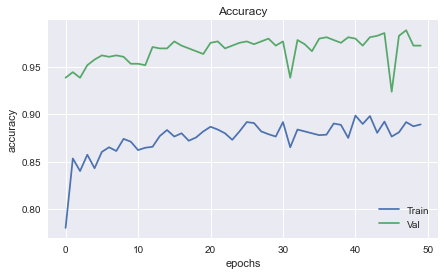

In [107]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

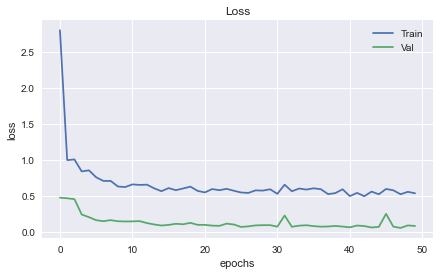

In [108]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Keras Tuner

In [95]:
import keras_tuner as kt

In [96]:
def model_builder(hp):
    model = tf.keras.models.Sequential()
    hp_units1 = hp.Int('units1', min_value=32, max_value=128, step=32)
    hp_dropout_rate1 = hp.Float('dropout1', 0, 0.2, step=0.05)
    hp_units2 = hp.Int('units2', min_value=32, max_value=128, step=32)
    hp_dropout_rate2 = hp.Float('dropout2', 0, 0.2, step=0.05)
    model.add(tf.keras.layers.Dense(hp_units1, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(hp_dropout_rate1))
    model.add(tf.keras.layers.Dense(hp_units2, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(hp_dropout_rate2))
    model.add(tf.keras.layers.Softmax())
    #Tune learning rate between 0.01, 0.001, 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

In [98]:
tuner = kt.RandomSearch(model_builder,
                                objective='val_accuracy',
                                max_trials=5,
                                directory='random3')

In [99]:
tuner.search(train_X, train_y, 
             epochs=50,
             batch_size=8,
             validation_data=(val_X, val_y))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.9558823704719543

Best val_accuracy So Far: 0.9838235378265381
Total elapsed time: 00h 00m 59s
INFO:tensorflow:Oracle triggered exit


In [100]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print('Best Hyperparameters: ', best_hps.values)

Best Hyperparameters:  {'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.0, 'learning_rate': 0.0001}


In [101]:
final_model = tuner.hypermodel.build(best_hps)
history_final = final_model.fit(train_X, train_y,
                              epochs=50,
                              validation_data=(val_X, val_y),
                              batch_size=8,
                              verbose=1)

Epoch 1/50
255/255 [==============================] - 0s 1ms/step - loss: 6.5207 - accuracy: 0.5289 - val_loss: 0.5285 - val_accuracy: 0.9368
Epoch 2/50
255/255 [==============================] - 0s 827us/step - loss: 0.6521 - accuracy: 0.9205 - val_loss: 0.4462 - val_accuracy: 0.9368
Epoch 3/50
255/255 [==============================] - 0s 866us/step - loss: 0.5114 - accuracy: 0.9289 - val_loss: 0.4215 - val_accuracy: 0.9441
Epoch 4/50
255/255 [==============================] - 0s 900us/step - loss: 0.4597 - accuracy: 0.9308 - val_loss: 0.3464 - val_accuracy: 0.9500
Epoch 5/50
255/255 [==============================] - 0s 849us/step - loss: 0.4108 - accuracy: 0.9396 - val_loss: 0.3210 - val_accuracy: 0.9471
Epoch 6/50
255/255 [==============================] - 0s 880us/step - loss: 0.3986 - accuracy: 0.9382 - val_loss: 0.3200 - val_accuracy: 0.9500
Epoch 7/50
255/255 [==============================] - 0s 839us/step - loss: 0.3903 - accuracy: 0.9382 - val_loss: 0.3074 - val_accuracy: 0

In [102]:
final_results = final_model.evaluate(test_X, test_y)
print("Loss:",final_results[0])
print("Accuracy:",final_results[1])

22/22 [==============================] - 0s 771us/step - loss: 0.0719 - accuracy: 0.9824
Loss: 0.07190486043691635
Accuracy: 0.9823529124259949


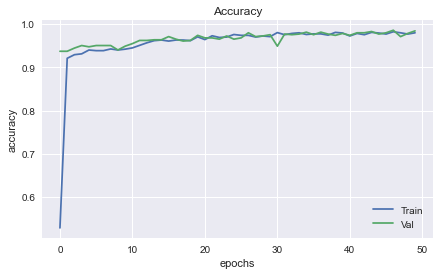

In [103]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(7,4))
plt.plot(history_final.history['accuracy'], label = 'Train')
plt.plot(history_final.history['val_accuracy'], label = 'Val')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

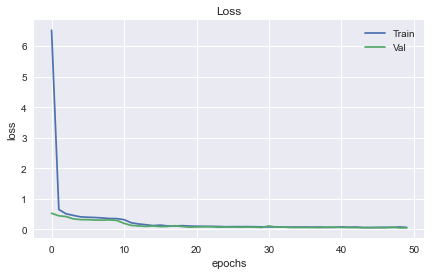

In [104]:
plt.figure(figsize=(7,4))
plt.plot(history_final.history['loss'], label = 'Train')
plt.plot(history_final.history['val_loss'], label = 'Val')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## DNN

In [79]:
import tensorflow as tf
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tf_data = arff.loadarff('hypothyroid_modified_cjlin.arff')
tf_df = pd.DataFrame(tf_data[0])
#tf_x = tf_df.drop(columns=['Class'])
tf_x = pd.get_dummies(tf_x)
tf_df = pd.get_dummies(tf_df)
#tf_y = tf_df['Class']
#tf_y = pd.get_dummies(tf_y)
tf_y = []
for i in range(3398):
    now = 0
    for key in tf_df.keys():
        if key == "Class_b'compensated_hypothyroid'":
            if tf_df[key][i] == 1:
            #label_y[i][0] = df2[key][i]
                tf_y.append(0)
        elif key == "Class_b'negative'":
            if tf_df[key][i] == 1:
            #label_y[i][1] = df2[key][i]
                tf_y.append(1)
        elif key == "Class_b'primary_hypothyroid'":
            if tf_df[key][i] == 1:
            #label_y[i][2] = df2[key][i]
                tf_y.append(2)
        elif key == "Class_b'secondary_hypothyroid'":
            if tf_df[key][i] == 1:
            #label_y[i][3] = df2[key][i]
                tf_y.append(3)
        now += 1
        
tf_x_train, tf_x_test, tf_y_train, tf_y_test = train_test_split(tf_x,tf_y,test_size=0.2)
for key in tf_x_train.keys():
    tmp_s = key.replace(" ","_")
    tmp_s = tmp_s.replace("'","_")
    tf_x_train[tmp_s] = tf_x_train.pop(key)
for key in tf_x_test.keys():
    tmp_s = key.replace(" ","_")
    tmp_s = tmp_s.replace("'","_")
    tf_x_test[tmp_s] = tf_x_test.pop(key)

In [71]:
tf_y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [80]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # 將 NumPy Array 轉成 Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # 隨機抽樣
    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)
    
# 建立 Feature columns 提供給 Estimator 使用
my_feature_columns = []
for key in tf_x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
my_feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TSH', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='T3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TT4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='T4U', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='FTI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sex_b_F_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sex_b_M_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='on_thyroxine_b_f_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='on_thyroxine_b_t_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=

In [81]:
tf_clf = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=4)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmp3333b9m3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [82]:
tf_clf.train(
    input_fn=lambda: input_fn(tf_x_train, tf_y_train, training=True),
    steps=5000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\user\AppData\Local\Temp\tmp3333b9m3\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:los

In [84]:
eval_result = tf_clf.evaluate(
    input_fn=lambda: input_fn(tf_x_test, tf_y_test, training=False))
print('\n準確度: {accuracy:0.4f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-06-18T20:12:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmp3333b9m3\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.29026s
INFO:tensorflow:Finished evaluation at 2022-06-18-20:12:43
INFO:tensorflow:Saving dict for global step 5000: a